In [1]:
# 1. Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from tensorflow.python.keras.utils import np_utils

In [8]:
# 2. Load CIFAR dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val, y_val = X_train[40000:50000,:], y_train[40000:50000]
X_train, y_train = X_train[:40000,:], y_train[:40000]
print(X_train.shape)


(40000, 32, 32, 3)


In [12]:
# 3. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
# 4. Build model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 2x2
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [14]:
# 5. Compile model
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [16]:
# 6. Fit model
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1250/1250 [==============================] - 43s 34ms/step - loss: 1.6812 - accuracy: 0.3965 - val_loss: 1.3959 - val_accuracy: 0.5115
Epoch 2/10
1250/1250 [==============================] - 42s 33ms/step - loss: 1.1959 - accuracy: 0.5809 - val_loss: 1.2331 - val_accuracy: 0.5704
Epoch 3/10
1250/1250 [==============================] - 43s 35ms/step - loss: 0.9349 - accuracy: 0.6715 - val_loss: 1.2793 - val_accuracy: 0.5877
Epoch 4/10
1250/1250 [==============================] - 42s 34ms/step - loss: 0.7318 - accuracy: 0.7453 - val_loss: 1.3166 - val_accuracy: 0.5921
Epoch 5/10
1250/1250 [==============================] - 42s 34ms/step - loss: 0.5624 - accuracy: 0.8026 - val_loss: 1.5440 - val_accuracy: 0.5817
Epoch 6/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.4263 - accuracy: 0.8534 - val_loss: 1.7096 - val_accuracy: 0.5808
Epoch 7/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.3596 - accuracy: 0.8780 - val_loss: 2.0562 -

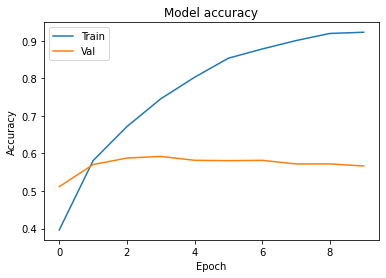

In [17]:
# 7. Plot accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

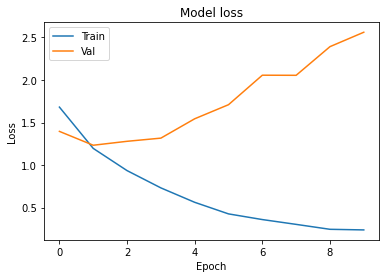

In [18]:
# 8. Plot loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [19]:
# 9. Evaluate model
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[2.6073973178863525, 0.5634999871253967]


Predict:  bird


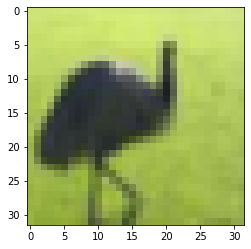

In [38]:
# 10. CIFAR10 prediction
index = 123
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
pred = model.predict(X_test, verbose=0)
pred = np.argmax(pred,axis = 1)
plt.imshow(X_test[index])
print('Predict: ' ,classes[pred[index]])

In [31]:
# 11. Save model
# model.save('cifar10_cnn.h5')

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
